<a href="https://colab.research.google.com/github/Doggazyasmine/mon_projet_reseau/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install networkx matplotlib cdlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.6/263.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 128.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 119.7 MB/s eta 0:00:00


Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'graph_tool', 'bayanpy', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'infomap'}
Téléchargement du dataset...
Nombre de nœuds : 35778
Nombre d'arêtes : 124331


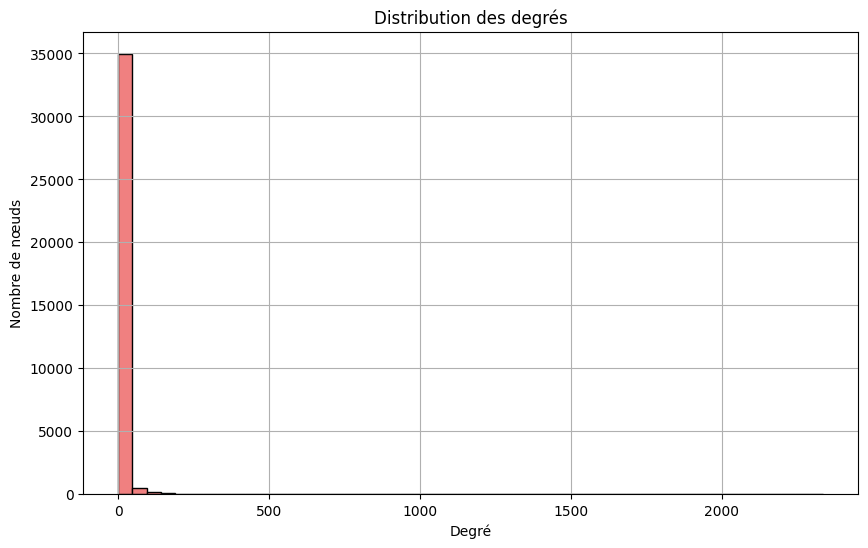

Nombre de composants connectés : 498
Taille du plus grand composant : 34671 nœuds
Clustering moyen : 0.1862
Densité du graphe : 0.0002
Top 5 des nœuds par centralité :
  askreddit : 0.0674
  iama : 0.0530
  subredditdrama : 0.0461
  writingprompts : 0.0301
  outoftheloop : 0.0284
Louvain : 54 communautés trouvées
Label Propagation : 1199 communautés trouvées


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from cdlib import algorithms
import requests
from io import StringIO

# === Étape 1 : Télécharger et charger le graphe depuis l'URL ===
url = "https://snap.stanford.edu/data/soc-redditHyperlinks-body.tsv"

print("Téléchargement du dataset...")
response = requests.get(url)
data = StringIO(response.text)

G = nx.Graph()
for line in data:
    if line.startswith("#"):
        continue  # Ignorer les commentaires
    parts = line.strip().split("\t")
    if len(parts) >= 2:
        source = parts[0]
        target = parts[1]
        G.add_edge(source, target)

print(f"Nombre de nœuds : {G.number_of_nodes()}")
print(f"Nombre d'arêtes : {G.number_of_edges()}")

# === Étape 2 : Analyse du réseau ===

# a) Distribution des degrés
degrees = [deg for _, deg in G.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color='lightcoral', edgecolor='black')
plt.title("Distribution des degrés")
plt.xlabel("Degré")
plt.ylabel("Nombre de nœuds")
plt.grid(True)
plt.show()

# b) Composants connectés
components = list(nx.connected_components(G))
print(f"Nombre de composants connectés : {len(components)}")

# Travailler sur le plus grand composant
largest_comp = G.subgraph(max(components, key=len)).copy()
print(f"Taille du plus grand composant : {largest_comp.number_of_nodes()} nœuds")

# c) Clustering & densité
clust = nx.average_clustering(largest_comp)
dens = nx.density(largest_comp)
print(f"Clustering moyen : {clust:.4f}")
print(f"Densité du graphe : {dens:.4f}")

# d) Centralité
centrality = nx.degree_centrality(largest_comp)
top_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 des nœuds par centralité :")
for node, cent in top_nodes:
    print(f"  {node} : {cent:.4f}")

# === Étape 3 : Détection des communautés ===

# Louvain
comm_louvain = algorithms.louvain(largest_comp)
print(f"Louvain : {len(comm_louvain.communities)} communautés trouvées")

# Label Propagation
comm_label = algorithms.label_propagation(largest_comp)
print(f"Label Propagation : {len(comm_label.communities)} communautés trouvées")

# K-Clique (k=4)
comm_kclique = algorithms.kclique(largest_comp, k=4)
print(f"K-Clique (k=4) : {len(comm_kclique.communities)} communautés trouvées")
